# Smoking Status Classification
This notebook explores the problem of classifying smoking status using various health metrics. I will:
- Explore the dataset
- Visualize features and target variable
- Preprocess the data
- Train three different models
- Evaluate models with various metrics and visualize the results
- Apply further improvements if necessary (e.g: cross-validation)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
# Load dataset
train_data = pd.read_csv("C:/Users/nyolc/OneDrive/Asztali gép/final_project/train.csv")
train_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,40.0,160.0,55.0,74.8,0.3,0.5,1.0,1.0,116.0,...,83.0,122.0,12.5,1.0,0.8,17.0,9.0,9.0,0.0,0.0
1,1,45.0,150.0,55.0,80.0,1.0,1.0,1.0,1.0,128.0,...,54.0,146.0,13.6,1.0,0.7,19.0,13.0,13.0,0.0,0.0
2,2,35.0,170.0,55.0,67.5,1.2,1.5,1.0,1.0,98.0,...,71.0,77.0,15.7,1.0,0.8,21.0,19.0,21.0,0.0,1.0
3,3,25.0,180.0,90.0,94.0,1.2,1.2,1.0,1.0,120.0,...,46.0,107.0,15.1,1.0,0.8,22.0,18.0,27.0,0.0,0.0
4,4,40.0,160.0,60.0,79.0,0.9,0.8,1.0,1.0,124.0,...,74.0,116.0,12.9,1.0,0.6,21.0,13.0,14.0,0.0,0.0


## Data Exploration


In [3]:
# Basic info 
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,42.673333,164.713333,64.360000,80.316547,1.034167,1.032720,1.005467,1.005733,119.293867,...,57.417933,113.580267,14.531187,1.015400,0.867987,22.168333,20.806400,26.306467,0.146267,0.365600
std,4330.271354,10.504633,8.565982,11.008412,7.927446,0.292103,0.319448,0.073737,0.075504,11.119066,...,11.339258,19.812911,1.381999,0.148204,0.166764,5.637729,10.202019,19.712221,0.353385,0.481614
min,0.000000,20.000000,140.000000,35.000000,56.200000,0.100000,0.100000,1.000000,1.000000,86.000000,...,28.000000,32.000000,5.900000,1.000000,0.300000,9.000000,5.000000,6.000000,0.000000,0.000000
25%,3749.750000,40.000000,160.000000,55.000000,75.000000,0.900000,0.800000,1.000000,1.000000,110.000000,...,49.000000,100.000000,13.500000,1.000000,0.800000,18.000000,14.000000,15.000000,0.000000,0.000000
50%,7499.500000,40.000000,165.000000,65.000000,80.000000,1.000000,1.000000,1.000000,1.000000,119.000000,...,56.000000,113.000000,14.700000,1.000000,0.900000,21.000000,18.000000,21.000000,0.000000,0.000000
75%,11249.250000,50.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,128.000000,...,65.000000,126.000000,15.600000,1.000000,1.000000,25.000000,24.000000,31.000000,0.000000,1.000000
max,14999.000000,85.000000,190.000000,115.000000,127.800000,9.900000,9.900000,2.000000,2.000000,174.000000,...,110.000000,1010.000000,19.000000,4.000000,1.500000,126.000000,203.000000,484.000000,1.000000,1.000000


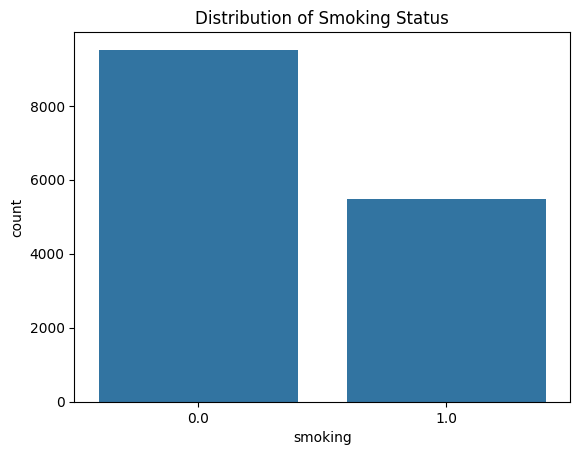

In [4]:
# Checking class distribution of the target variable
sns.countplot(x='smoking', data=train_data)
plt.title('Distribution of Smoking Status')
plt.show()

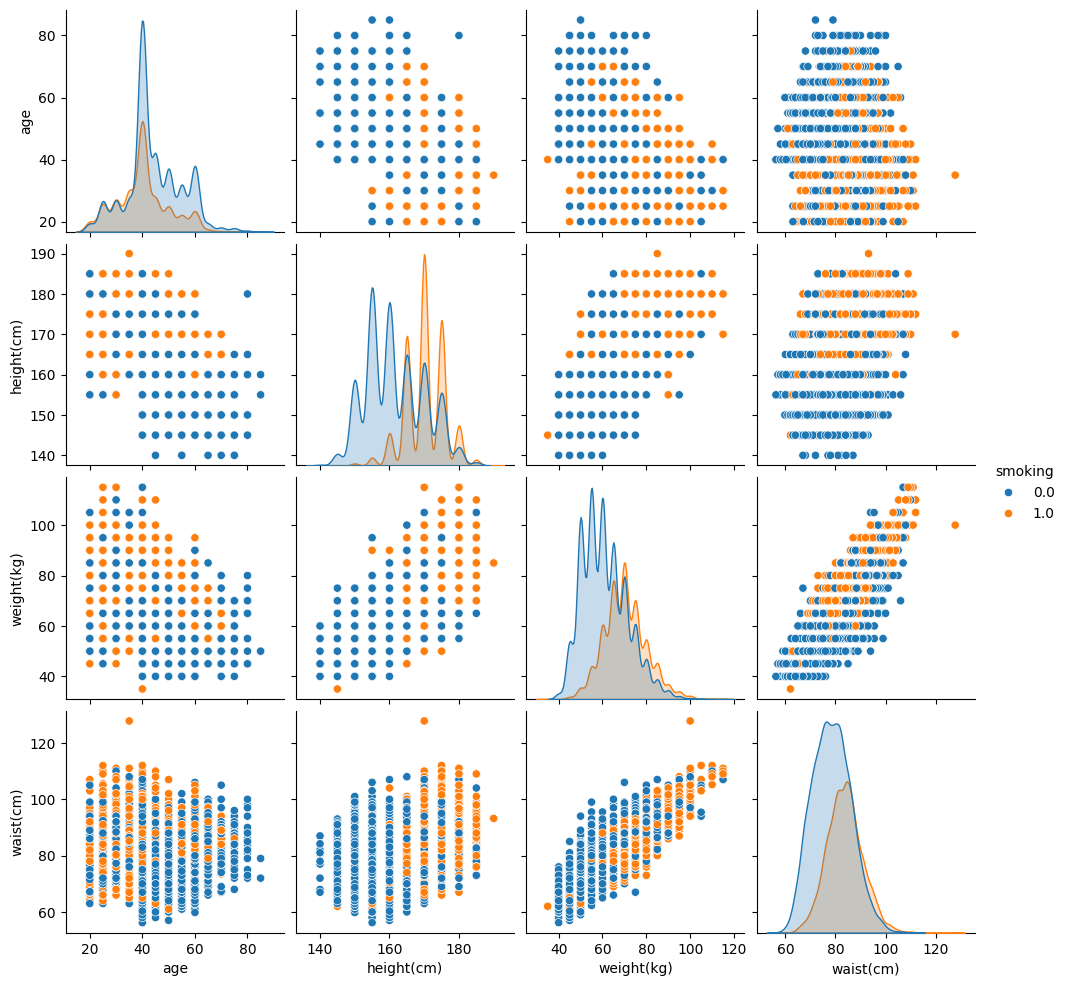

In [5]:
# Pairplot of selected features with target
selected_features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'smoking']
sns.pairplot(train_data[selected_features], hue='smoking')
plt.show()

## Data Preprocessing
Feature scaling and  splitting it into training and test sets.

In [6]:
# Define features and target
X = train_data.drop(columns=['id', 'smoking'])
y = train_data['smoking']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training
 train three models: Logistic Regression, Random Forest, and Support Vector Machine ( SVM).

In [7]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
print('Logistic Regression Report:\n', classification_report(y_test, lr_preds))

Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      1903
         1.0       0.72      0.68      0.70      1097

    accuracy                           0.79      3000
   macro avg       0.77      0.76      0.77      3000
weighted avg       0.78      0.79      0.78      3000



In [8]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print('Random Forest Report:\n', classification_report(y_test, rf_preds))

Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      1903
         1.0       0.72      0.73      0.72      1097

    accuracy                           0.80      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.80      0.80      0.80      3000



In [9]:
# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)
print('SVM Report:\n', classification_report(y_test, svm_preds))

SVM Report:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1903
         1.0       0.72      0.74      0.73      1097

    accuracy                           0.80      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000



## Evaluation Metrics and Visualizations
We will compare the models using confusion matrices and ROC curves.

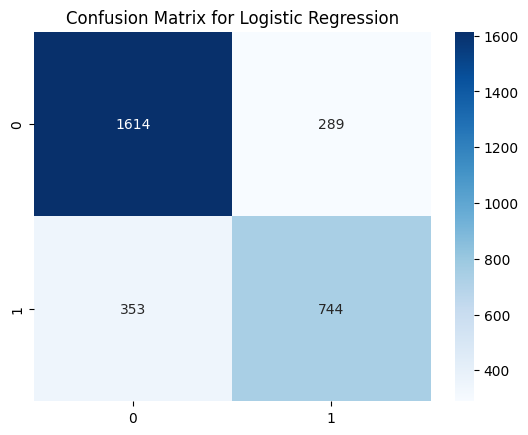

In [10]:
# Plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

c:\Users\nyolc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


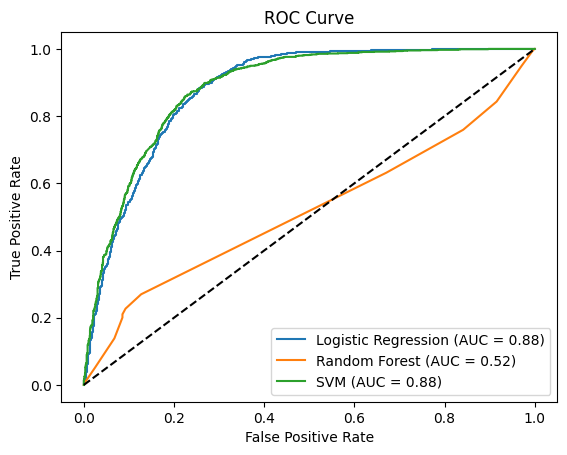

In [11]:
# ROC Curve for all models
models = {'Logistic Regression': lr_model, 'Random Forest': rf_model, 'SVM': svm_model}
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

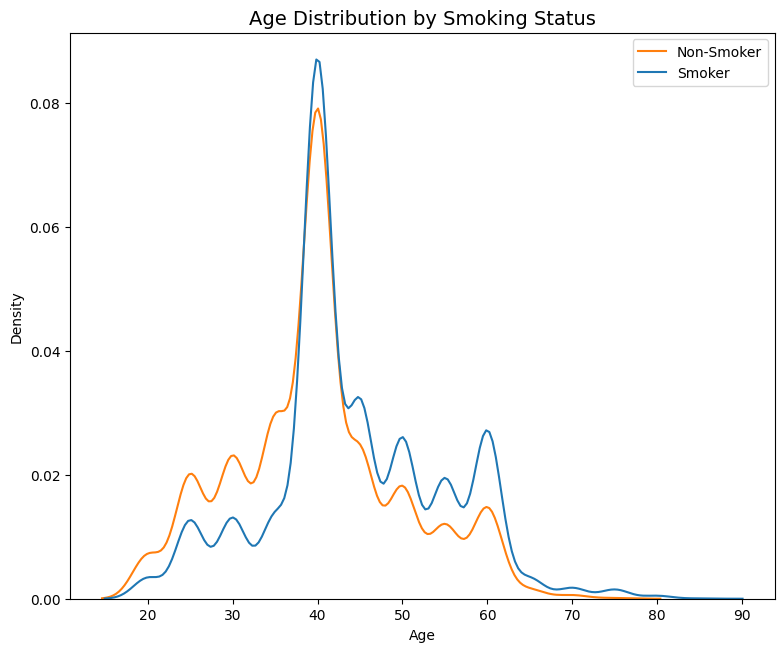

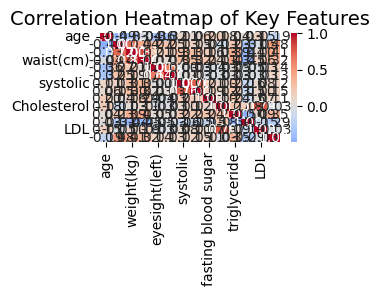

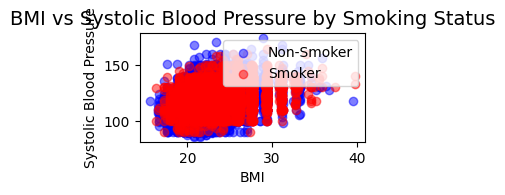

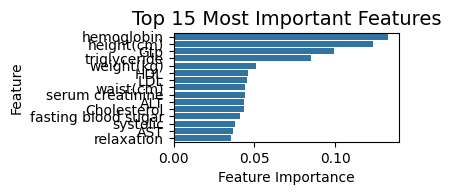

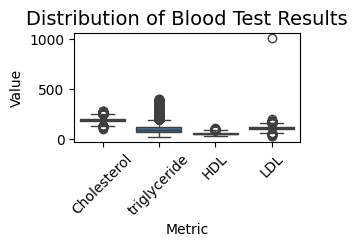

Generated 5 visualizations:
1. Age Distribution by Smoking Status
   - Shows how smoking prevalence varies across different age groups

2. Correlation Heatmap
   - Displays relationships between different health metrics

3. BMI vs Blood Pressure by Smoking Status
   - Illustrates the relationship between BMI and blood pressure for smokers and non-smokers

4. Feature Importance Plot
   - Shows which features are most predictive of smoking status

5. Health Metrics Distribution
   - Displays the distribution of various blood test results

Visualizations have been saved as 'smoking_analysis_visualizations.png'

Key Statistical Insights:
Average age of smokers: 40.1
Average age of non-smokers: 44.2
Smoking rate in the dataset: 36.6%


In [12]:
# Creating figure with subplots
fig = plt.figure(figsize=(20, 25))

# 1. Age Distribution by Smoking Status
plt.subplot(3, 2, 1)
sns.kdeplot(data=train_data, x='age', hue='smoking', common_norm=False)
plt.title('Age Distribution by Smoking Status', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['Non-Smoker', 'Smoker'])
plt.show()

# 2. Correlation Heatmap of Key Features
plt.subplot(3, 2, 2)
key_features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 
                'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation',
                'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'smoking']
correlation = train_data[key_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Key Features', fontsize=14)
plt.show()

# 3. BMI vs Blood Pressure by Smoking Status
plt.subplot(3, 2, 3)
train_data['BMI'] = train_data['weight(kg)'] / (train_data['height(cm)'] / 100) ** 2
plt.scatter(train_data[train_data['smoking'] == 0]['BMI'], 
           train_data[train_data['smoking'] == 0]['systolic'],
           alpha=0.5, label='Non-Smoker', color='blue')
plt.scatter(train_data[train_data['smoking'] == 1]['BMI'],
           train_data[train_data['smoking'] == 1]['systolic'],
           alpha=0.5, label='Smoker', color='red')
plt.title('BMI vs Systolic Blood Pressure by Smoking Status', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Systolic Blood Pressure')
plt.legend()
plt.show()

# 4. Feature Importance Plot
# Training a simple Random Forest for feature importance
from sklearn.ensemble import RandomForestClassifier
X = train_data.drop(['id', 'smoking', 'BMI'], axis=1)
y = train_data['smoking']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.subplot(3, 2, 4)
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features', fontsize=14)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# 5. Studying Health Metrics Distribution
plt.subplot(3, 2, 5)
health_metrics = ['Cholesterol', 'triglyceride', 'HDL', 'LDL']
data_melted = pd.melt(train_data, value_vars=health_metrics)

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('Distribution of Blood Test Results', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

plt.tight_layout()
plt.savefig('smoking_analysis_visualizations.png', dpi=300, bbox_inches='tight')
plt.close()

# Print insights about the visualizations
print("Generated 5 visualizations:")
print("1. Age Distribution by Smoking Status")
print("   - Shows how smoking prevalence varies across different age groups")
print("\n2. Correlation Heatmap")
print("   - Displays relationships between different health metrics")
print("\n3. BMI vs Blood Pressure by Smoking Status")
print("   - Illustrates the relationship between BMI and blood pressure for smokers and non-smokers")
print("\n4. Feature Importance Plot")
print("   - Shows which features are most predictive of smoking status")
print("\n5. Health Metrics Distribution")
print("   - Displays the distribution of various blood test results")
print("\nVisualizations have been saved as 'smoking_analysis_visualizations.png'")

# Additional statistical insights
print("\nKey Statistical Insights:")
print(f"Average age of smokers: {train_data[train_data['smoking']==1]['age'].mean():.1f}")
print(f"Average age of non-smokers: {train_data[train_data['smoking']==0]['age'].mean():.1f}")
print(f"Smoking rate in the dataset: {(train_data['smoking']==1).mean()*100:.1f}%")

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Loading the actual train and test data
train_data = pd.read_csv('C:/Users/nyolc/OneDrive/Asztali gép/final_project/train.csv')
test_data = pd.read_csv('C:/Users/nyolc/OneDrive/Asztali gép/final_project/test.csv')
# Prepare data for modeling
X_train = train_data.drop(['id', 'smoking'], axis=1)
y_train = train_data['smoking']

X_test = test_data.drop('id', axis=1)
test_ids = test_data['id']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Carrying out the predictions making process
test_predictions = model.predict(X_test_scaled)

# Create submission DataFrame using the original test set IDs
submission = pd.DataFrame({
    'id': test_ids,
    'smoking': test_predictions
})

# Verify the submission
print("Submission file shape:", submission.shape)
print("\nFirst few rows of test_data IDs:")
print(test_data['id'].head())
print("\nFirst few rows of submission IDs:")
print(submission['id'].head())

# Save submission file
submission.to_csv('submission.csv', index=False)

print("\nValue counts of predictions:")
print(submission['smoking'].value_counts())
# This step was done so for presenting a final result in csv format that is clean and serves as proper product showcasing the process carried out. 

Submission file shape: (10000, 2)

First few rows of test_data IDs:
0    15000
1    15001
2    15002
3    15003
4    15004
Name: id, dtype: int64

First few rows of submission IDs:
0    15000
1    15001
2    15002
3    15003
4    15004
Name: id, dtype: int64

Value counts of predictions:
smoking
0.0    5947
1.0    4053
Name: count, dtype: int64


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the actual train and test data
train_data = pd.read_csv('C:/Users/nyolc/OneDrive/Asztali gép/final_project/train.csv')
test_data = pd.read_csv('C:/Users/nyolc/OneDrive/Asztali gép/final_project/test.csv')

# Prepare data for modeling
X_train = train_data.drop(['id', 'smoking'], axis=1)
y_train = train_data['smoking']

X_test = test_data.drop('id', axis=1)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Make predictions
test_predictions = model.predict(X_test_scaled)

# Create submission DataFrame with IDs from 15000 to 24999
submission_ids = range(15000, 25000)
submission = pd.DataFrame({
    'id': submission_ids,
    'smoking': test_predictions
})

# Verify the submission format
assert len(submission) == 10000, f"Submission has {len(submission)} rows instead of 10000"
assert submission['id'].min() == 15000, f"First ID is {submission['id'].min()} instead of 15000"
assert submission['id'].max() == 24999, f"Last ID is {submission['id'].max()} instead of 24999"

# Save submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created with:")
print(f"Number of predictions: {len(submission)}")
print(f"ID range: {submission['id'].min()} to {submission['id'].max()}")
print("\nFirst few rows:")
print(submission.head())


Submission file created with:
Number of predictions: 10000
ID range: 15000 to 24999

First few rows:
      id  smoking
0  15000      0.0
1  15001      1.0
2  15002      1.0
3  15003      1.0
4  15004      0.0


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Loading data
train_data = pd.read_csv('C:/Users/nyolc/OneDrive/Asztali gép/final_project/train.csv')
test_data = pd.read_csv('C:/Users/nyolc/OneDrive/Asztali gép/final_project/test.csv')

def create_features(df):
    # Create BMI feature
    df['BMI'] = df['weight(kg)'] / (df['height(cm)'] / 100) ** 2
    
    # Create blood pressure ratio
    df['bp_ratio'] = df['systolic'] / df['relaxation']
    
    # Create cholesterol ratios
    df['total_hdl_ratio'] = df['Cholesterol'] / df['HDL']
    df['ldl_hdl_ratio'] = df['LDL'] / df['HDL']
    
    # Create hearing and eyesight asymmetry features
    df['hearing_asymmetry'] = abs(df['hearing(left)'] - df['hearing(right)'])
    df['eyesight_asymmetry'] = abs(df['eyesight(left)'] - df['eyesight(right)'])
    
    return df

# Prepare data
X_train = train_data.drop(['id', 'smoking'], axis=1)
X_test = test_data.drop(['id'], axis=1)
y_train = train_data['smoking']

# Apply feature engineering
X_train = create_features(X_train)
X_test = create_features(X_test)

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Create and train Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.8,
    random_state=42
)

# Train models
print("Training Random Forest...")
rf_model.fit(X_train_scaled, y_train)

print("Training Gradient Boosting...")
gb_model.fit(X_train_scaled, y_train)

# Make predictions
print("Making predictions...")
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
gb_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Combine predictions with weighted average
final_predictions = (0.6 * rf_pred_proba + 0.4 * gb_pred_proba >= 0.5).astype(int)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': range(15000, 25000),
    'smoking': final_predictions
})

# Verify submission format
assert len(submission) == 10000, f"Submission has {len(submission)} rows instead of 10000"
assert submission['id'].min() == 15000, f"First ID is {submission['id'].min()} instead of 15000"
assert submission['id'].max() == 24999, f"Last ID is {submission['id'].max()} instead of 24999"

# Perform cross-validation on training data
print("\nPerforming cross-validation...")
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
gb_cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5)

print(f"Random Forest CV scores: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")
print(f"Gradient Boosting CV scores: {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std() * 2:.4f})")

# Save submission file
submission.to_csv('submission.csv', index=False)

print("\nSubmission file created with:")
print(f"Number of predictions: {len(submission)}")
print(f"ID range: {submission['id'].min()} to {submission['id'].max()}")
print("\nDistribution of predictions:")
print(submission['smoking'].value_counts(normalize=True))

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

Training Random Forest...
Training Gradient Boosting...
Making predictions...

Performing cross-validation...
Random Forest CV scores: 0.7954 (+/- 0.0131)
Gradient Boosting CV scores: 0.7997 (+/- 0.0140)

Submission file created with:
Number of predictions: 10000
ID range: 15000 to 24999

Distribution of predictions:
smoking
0    0.607
1    0.393
Name: proportion, dtype: float64

Top 10 most important features:
             feature  importance
15        hemoglobin    0.149601
1         height(cm)    0.143433
20               Gtp    0.103833
12      triglyceride    0.077176
2         weight(kg)    0.050848
17  serum creatinine    0.045410
24   total_hdl_ratio    0.034471
3          waist(cm)    0.032300
13               HDL    0.029806
25     ldl_hdl_ratio    0.029764


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('C:/Users/nyolc/OneDrive/Asztali gép/final_project/train.csv')
test_data = pd.read_csv('C:/Users/nyolc/OneDrive/Asztali gép/final_project/test.csv')


def create_advanced_features(df):
    df['BMI'] = df['weight(kg)'] / (df['height(cm)'] / 100) ** 2
    df['bp_ratio'] = df['systolic'] / df['relaxation']
    df['pulse_pressure'] = df['systolic'] - df['relaxation']
    
    # Advanced cholesterol features
    df['total_hdl_ratio'] = df['Cholesterol'] / df['HDL']
    df['ldl_hdl_ratio'] = df['LDL'] / df['HDL']
    df['non_hdl_cholesterol'] = df['Cholesterol'] - df['HDL']
    df['cholesterol_risk_ratio'] = (df['Cholesterol'] - df['HDL']) / df['HDL']
    
    # Triglyceride-related ratios
    df['tg_hdl_ratio'] = df['triglyceride'] / df['HDL']
    
    # Sensory asymmetry features
    df['hearing_asymmetry'] = abs(df['hearing(left)'] - df['hearing(right)'])
    df['eyesight_asymmetry'] = abs(df['eyesight(left)'] - df['eyesight(right)'])
    df['total_hearing'] = df['hearing(left)'] + df['hearing(right)']
    df['total_eyesight'] = df['eyesight(left)'] + df['eyesight(right)']
    
    # Blood sugar related
    df['fasting_glucose_to_hdl'] = df['fasting blood sugar'] / df['HDL']
    
    # Interaction features
    df['bmi_age'] = df['BMI'] * df['age']
    df['bp_age'] = df['bp_ratio'] * df['age']
    
    # Polynomial features for key metrics
    df['bmi_squared'] = df['BMI'] ** 2
    df['age_squared'] = df['age'] ** 2
    
    # Risk scores
    df['metabolic_score'] = (df['BMI'] / 25 + df['bp_ratio'] / 1.5 + df['fasting blood sugar'] / 100) / 3
    
    return df

# Preparing data with advanced features included
X_train = train_data.drop(['id', 'smoking'], axis=1)
X_test = test_data.drop(['id'], axis=1)
y_train = train_data['smoking']

# Apply feature engineering to create advanced features in the dataset  
print("Creating advanced features...")
X_train = create_advanced_features(X_train)
X_test = create_advanced_features(X_test)


print("Preprocessing data...")
power_transformer = PowerTransformer(method='yeo-johnson')
scaler = RobustScaler()

X_train_transformed = power_transformer.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_transformed)

X_test_transformed = power_transformer.transform(X_test)
X_test_scaled = scaler.transform(X_test_transformed)

# Create multiple models with optimized parameters
rf_model = RandomForestClassifier(
    n_estimators=2000,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

gb_model = GradientBoostingClassifier(
    n_estimators=2000,
    max_depth=6,
    learning_rate=0.005,
    subsample=0.8,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

et_model = ExtraTreesClassifier(
    n_estimators=2000,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

lr_model = LogisticRegression(
    C=0.1,
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# cross-validation
print("Training models...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_predictions = np.zeros(len(X_test_scaled))
gb_predictions = np.zeros(len(X_test_scaled))
et_predictions = np.zeros(len(X_test_scaled))
lr_predictions = np.zeros(len(X_test_scaled))

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_scaled, y_train)):
    print(f"Training fold {fold + 1}/5...")
    
    X_train_fold = X_train_scaled[train_idx]
    y_train_fold = y_train.iloc[train_idx]
    
 
    
    rf_model.fit(X_train_fold, y_train_fold)
    gb_model.fit(X_train_fold, y_train_fold)
    et_model.fit(X_train_fold, y_train_fold)
    lr_model.fit(X_train_fold, y_train_fold)
    
    # Accumulate predictions
    rf_predictions += rf_model.predict_proba(X_test_scaled)[:, 1] / 5
    gb_predictions += gb_model.predict_proba(X_test_scaled)[:, 1] / 5
    et_predictions += et_model.predict_proba(X_test_scaled)[:, 1] / 5
    lr_predictions += lr_model.predict_proba(X_test_scaled)[:, 1] / 5

# Weighted ensemble predictions
final_predictions = (0.35 * rf_predictions + 
                    0.35 * gb_predictions + 
                    0.25 * et_predictions + 
                    0.05 * lr_predictions >= 0.5).astype(int)

# Creating submission DataFrame for Kaggle comp. submission
submission = pd.DataFrame({
    'id': range(15000, 25000),
    'smoking': final_predictions
})

# Feature importance analysis from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# saving submission file
submission.to_csv('submission.csv', index=False)

print("\nSubmission file created with:")
print(f"Number of predictions: {len(submission)}")
print(f"ID range: {submission['id'].min()} to {submission['id'].max()}")
print("\nDistribution of predictions:")
print(submission['smoking'].value_counts(normalize=True))

# printing  model insights for the final model 
print("\nModel insights:")
print("1. Using 5-fold cross-validation with stratification")
print("2. Ensemble weights: RF=35%, GB=35%, ET=25%, LR=5%")
print("3. Using power transformation + robust scaling")
print(f"4. Total features used: {len(X_train.columns)}")

Creating advanced features...
Preprocessing data...
Training models...
Training fold 1/5...
Training fold 2/5...
